> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigation of TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

### Overview
In this project, I am going to perform data analysis on TMDB Movies Dataset. This Dataset contains 10000+ movie details including genres, runtime, budget, release_date etc. Using this dataset, I am going to investigate some questions made by me only and organize the result in an interactive way that could be in tabular form or visualization using different graphs depends on the data so that a user or reviewer can understand it easily.

#### Questions which I am going to investigate : -
1.  Top 10 highest budget and lowest budget movies ?
2.  Average budget of Profitable and Non profitable movies ?
3.  Top 10 highest and lowest revenue movies ?
4.  Average revenue of Profitable and Non Profitable movies ?
5.  Top 10 Profitable Movies and Non Profitable Movies ?
6.  Average Profit of Profitable and Non Profitable movies ?
7.  Top Most Popular Movies and Unpopular Movies ?
8.  Visualizing the data using Genre ?
9.  Visualizing movies according to their Production Companies ?
10. Average Runtime for Profitable Movies and Non-Profitable Movies ?
11. Top-Voted Movies ?
12. Which director gave most successful movies ?
13. Total Released Movie by year ?
14. Genre Trends over the Year ?
15. Profitable and Non Profitable movies by year ?
16. Profit over the Year ?
17. How vote counts and vote average related to Profit ?
18. How runtime related with release years ?
19. Casts appear most in Profitable and Non Profitable Movies ?
20. Properties associated with high Profit ?

In [1029]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties
Here I load the data using Pandas from the csv file file containing all the columns and checking the size and data types.

In [1030]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

full_df = pd.read_csv('tmdb-movies.csv')

#Information about the dataset
print(full_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning :- 
In this section, I performed data cleaning by removing unnecessary columns, duplicate values, NaN values etc. Niether I have converted the data in the format nor change the datatypes because the Questions (mentioned above), I am going to investigate has no use of release_date column. I only use release_year which is already in Integer.

In [1031]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#removing unnecessary columns
unnecessary_columns = ['imdb_id', 'homepage', 'overview', 'release_date', 'budget_adj', 'revenue_adj']
df = full_df.drop(unnecessary_columns, axis=1)
df.head(5)

id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
1   future|chase|post-apocalyptic|dystopia|australia      120   
2  based on novel|revolution|dystopia|sequel|dyst...      119   
3              android|spaceship|jedi|space opera|3d      136   
4                car race|speed|revenge|suspense|car      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot        5292   
4  Universal Pictures|Original Film|Media Rights ...        2947   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015  
2           6.3          2015  
3           7.5          2015  
4           7.3          2015

### Removing Duplicate Values :-

In [1033]:
# Check for duplicated data
df[df.duplicated()==True]

id  popularity    budget  revenue original_title  \
2090  42194     0.59643  30000000   967000         TEKKEN   

                                                   cast          director  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...  Dwight H. Little   

                  tagline                                           keywords  \
2090  Survival is no game  martial arts|dystopia|based on video game|mart...   

      runtime                                       genres  \
2090       92  Crime|Drama|Action|Thriller|Science Fiction   

        production_companies  vote_count  vote_average  release_year  
2090  Namco|Light Song Films         110           5.0          2010

In [1034]:
# Removing duplicate data
df.drop_duplicates(inplace=True)

In [1035]:
df.duplicated().sum()

0

### Some Statistics about the Data :-

In [1036]:
# Some statistics for numerical columns
df.describe()

id    popularity        budget       revenue       runtime  \
count   10865.000000  10865.000000  1.086500e+04  1.086500e+04  10865.000000   
mean    66066.374413      0.646446  1.462429e+07  3.982690e+07    102.071790   
std     92134.091971      1.000231  3.091428e+07  1.170083e+08     31.382701   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.000000      0.207575  0.000000e+00  0.000000e+00     90.000000   
50%     20662.000000      0.383831  0.000000e+00  0.000000e+00     99.000000   
75%     75612.000000      0.713857  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year  
count  10865.000000  10865.000000  10865.000000  
mean     217.399632      5.975012   2001.321859  
std      575.644627      0.935138     12.813260  
min       10.000000      1.500000   1960.000000  
25%       17.000000      5.400000   1995.000000  
50%       38.000000      6.000000   2006.000000  
75%      146.000000      6.600000   2011.000000  
max     9767.000000      9.200000   2015.000000

### Printing Zero Budget and Zero Revenue Movies

Zero Budget : It may be a cause of insufficient data or any other reason. Here I am printing the data with Zero Budget.

Zero Revenue : It can be a valid column because it could possible that the movies weren't released after making it.

In [1038]:
# Run this cell to see zero budget movies

zero_budget_movies = df.groupby('budget').get_group(0)
zero_budget_movies.head()

id  popularity  budget   revenue                  original_title  \
30  280996    3.927333       0  29355203                      Mr. Holmes   
36  339527    3.358321       0  22354572                          Solace   
72  284289    2.272044       0     45895                Beyond the Reach   
74  347096    2.165433       0         0          Mythica: The Darkspore   
75  308369    2.141506       0         0  Me and Earl and the Dying Girl   

                                                 cast  \
30  Ian McKellen|Milo Parker|Laura Linney|Hattie M...   
36  Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...   
72  Michael Douglas|Jeremy Irvine|Hanna Mangan Law...   
74  Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...   
75  Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...   

                   director  \
30              Bill Condon   
36            Afonso Poyart   
72  Jean-Baptiste LÃ©onetti   
74            Anne K. Black   
75      Alfonso Gomez-Rejon   

                                              tagline  \
30                            The man behind the myth   
36  A serial killer who can see your future, a psy...   
72                                                NaN   
74                                                NaN   
75           A Little Friendship Never Killed Anyone.   

                                             keywords  runtime  \
30                   london|detective|sherlock holmes      103   
36  thriller|serial killer|psychic|fbi agent|intrigue      101   
72                                     desert|hunting       95   
74     sword|magic|sorcery|necromancer|woman director      108   
75         tattoo|high school|leukemia|friends|parody      105   

                      genres  \
30             Mystery|Drama   
36       Crime|Drama|Mystery   
72                  Thriller   
74  Action|Adventure|Fantasy   
75              Comedy|Drama   

                                 production_companies  vote_count  \
30  BBC Films|See-Saw Films|FilmNation Entertainme...         425   
36  Eden Rock Media|FilmNation Entertainment|Flynn...         474   
72                                      Furthur Films          81   
74                           Arrowstorm Entertainment          27   
75                                  Indian Paintbrush         569   

    vote_average  release_year  
30           6.4          2015  
36           6.2          2015  
72           5.5          2015  
74           5.1          2015  
75           7.7          2015

In [1040]:
# Run this cell to see zero revenue movies

zero_revenue_movies = df.groupby('revenue').get_group(0)
zero_revenue_movies.head()

id  popularity    budget  revenue                  original_title  \
48  265208    2.932340  30000000        0                       Wild Card   
67  334074    2.331636  20000000        0                        Survivor   
74  347096    2.165433         0        0          Mythica: The Darkspore   
75  308369    2.141506         0        0  Me and Earl and the Dying Girl   
92  370687    1.876037         0        0        Mythica: The Necromancer   

                                                 cast             director  \
48  Jason Statham|Michael Angarano|Milo Ventimigli...           Simon West   
67  Pierce Brosnan|Milla Jovovich|Dylan McDermott|...       James McTeigue   
74  Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...        Anne K. Black   
75  Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...  Alfonso Gomez-Rejon   
92  Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...        A. Todd Smith   

                                        tagline  \
48  Never bet against a man with a killer hand.   
67           His Next Target is Now Hunting Him   
74                                          NaN   
75     A Little Friendship Never Killed Anyone.   
92                                          NaN   

                                          keywords  runtime  \
48                       gambling|bodyguard|remake       92   
67  new year's eve|fire|showdown|terrorist|embassy       96   
74  sword|magic|sorcery|necromancer|woman director      108   
75      tattoo|high school|leukemia|friends|parody      105   
92                 sword|magic|sorcery|necromancer        0   

                      genres  \
48      Thriller|Crime|Drama   
67     Crime|Thriller|Action   
74  Action|Adventure|Fantasy   
75              Comedy|Drama   
92  Fantasy|Action|Adventure   

                                 production_companies  vote_count  \
48  Current Entertainment|Lionsgate|Sierra / Affin...         481   
67  Nu Image Films|Winkler Films|Millennium Films|...         280   
74                           Arrowstorm Entertainment          27   
75                                  Indian Paintbrush         569   
92  Arrowstorm Entertainment|Camera 40 Productions...          11   

    vote_average  release_year  
48           5.3          2015  
67           5.4          2015  
74           5.1          2015  
75           7.7          2015  
92           5.4          2015

In [1042]:
# zero budget and zero revenue movies

zero_budget_and_revenue = df.groupby(['budget', 'revenue']).get_group((0,0)) 
zero_budget_and_revenue.head()

id  popularity  budget  revenue                  original_title  \
74   347096    2.165433       0        0          Mythica: The Darkspore   
75   308369    2.141506       0        0  Me and Earl and the Dying Girl   
92   370687    1.876037       0        0        Mythica: The Necromancer   
100  326359    1.724712       0        0                    Frozen Fever   
101  254302    1.661789       0        0                       High-Rise   

                                                  cast  \
74   Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...   
75   Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...   
92   Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...   
100  Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...   
101  Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...   

                    director                                   tagline  \
74             Anne K. Black                                       NaN   
75       Alfonso Gomez-Rejon  A Little Friendship Never Killed Anyone.   
92             A. Todd Smith                                       NaN   
100  Chris Buck|Jennifer Lee                                       NaN   
101             Ben Wheatley               Leave the real world behind   

                                              keywords  runtime  \
74      sword|magic|sorcery|necromancer|woman director      108   
75          tattoo|high school|leukemia|friends|parody      105   
92                     sword|magic|sorcery|necromancer        0   
100  sister sister relationship|birthday|song|birth...        8   
101                               skyscraper|high rise      119   

                           genres  \
74       Action|Adventure|Fantasy   
75                   Comedy|Drama   
92       Fantasy|Action|Adventure   
100    Adventure|Animation|Family   
101  Action|Drama|Science Fiction   

                                  production_companies  vote_count  \
74                            Arrowstorm Entertainment          27   
75                                   Indian Paintbrush         569   
92   Arrowstorm Entertainment|Camera 40 Productions...          11   
100  Walt Disney Pictures|Walt Disney Animation Stu...         475   
101  Ingenious Media|HanWay Films|Scope Pictures|Re...         161   

     vote_average  release_year  
74            5.1          2015  
75            7.7          2015  
92            5.4          2015  
100           7.0          2015  
101           5.4          2015

### Printing all the Taglines which has Null or Empty Value :-

In this section, I am printing the taglines which has Null Values.

In [1043]:
# Run this cell to get Null Tagline data

null_values = df['tagline'].isnull()
null_indices = null_values[null_values==True].index[:]
null_tagline_data = df.iloc[null_indices]
null_tagline_data.head()

id  popularity    budget    revenue            original_title  \
42  321697    3.079522  30000000   34441873                Steve Jobs   
53  274479    2.793297  60000000  101134059                       Joy   
72  284289    2.272044         0      45895          Beyond the Reach   
74  347096    2.165433         0          0    Mythica: The Darkspore   
92  370687    1.876037         0          0  Mythica: The Necromancer   

                                                 cast  \
42  Michael Fassbender|Kate Winslet|Seth Rogen|Kat...   
53  Jennifer Lawrence|Bradley Cooper|Robert De Nir...   
72  Michael Douglas|Jeremy Irvine|Hanna Mangan Law...   
74  Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...   
92  Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...   

                   director tagline  \
42              Danny Boyle     NaN   
53         David O. Russell     NaN   
72  Jean-Baptiste LÃ©onetti     NaN   
74            Anne K. Black     NaN   
92            A. Todd Smith     NaN   

                                             keywords  runtime  \
42  biography|computer|based on true story|father ...      122   
53                                          biography      124   
72                                     desert|hunting       95   
74     sword|magic|sorcery|necromancer|woman director      108   
92                    sword|magic|sorcery|necromancer        0   

                      genres  \
42             History|Drama   
53              Comedy|Drama   
72                  Thriller   
74  Action|Adventure|Fantasy   
92  Fantasy|Action|Adventure   

                                 production_companies  vote_count  \
42  Universal Pictures|Scott Rudin Productions|Leg...        1035   
53  Fox 2000 Pictures|Davis Entertainment|Annapurn...        1001   
72                                      Furthur Films          81   
74                           Arrowstorm Entertainment          27   
92  Arrowstorm Entertainment|Camera 40 Productions...          11   

    vote_average  release_year  
42           6.9          2015  
53           6.4          2015  
72           5.5          2015  
74           5.1          2015  
92           5.4          2015

### Assigning a Profit column in the Dataset :-
Here I am assigning a 'profit' column in the dataset so that I can find the profitable and non profitable movies.

In [1044]:
# Adding a profit column in the dataset
df['profit'] = df['revenue'] - df['budget']

In [1045]:
# finding profitable and non profitable movies

profitable_movies = df[df['profit']>=0]
non_profitable_movies = df[df['profit']<0]

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 : Top 10 Highest and Lowest Budget Movies
In this section, I have made two function which returns the top 10 dataset and the lowest 10 dataset in the form of DataFrame for any given dataset (i.e. column name).

In [267]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#Function to find top 10 movie details according to their column_values
def top_10(data):
    first_10_index = pd.Series(data.sort_values(ascending=False)[:10].index[:])
    for i in range(len(first_10_index)):
        if first_10_index[i]>=2090:
            first_10_index[i]-=1
    first_10 = df.iloc[first_10_index]
    return first_10

# Function to find lowest 10 movie details according to their column_values
def lowest_10(data):
    last_10_index = pd.Series(data.sort_values()[:10].index[:])
    for i in range(len(last_10_index)):
        if last_10_index[i]>=2090:
            last_10_index[i]-=1
    last_10 = df.iloc[last_10_index]
    return last_10

In [1046]:
first_10_budget = top_10(df['budget'])

# Top 10 highest budget movies
first_10_budget.head(3)

id  popularity     budget     revenue  \
2244  46528    0.250540  425000000    11087569   
3375   1865    4.955130  380000000  1021683000   
7387    285    4.965391  300000000   961000000   

                                   original_title  \
2244                            The Warrior's Way   
3375  Pirates of the Caribbean: On Stranger Tides   
7387     Pirates of the Caribbean: At World's End   

                                                   cast        director  \
2244  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...      Sngmoo Lee   
3375  Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...    Rob Marshall   
7387  Johnny Depp|Orlando Bloom|Keira Knightley|Geof...  Gore Verbinski   

                                             tagline  \
2244                         Assassin. Hero. Legend.   
3375                     Live Forever Or Die Trying.   
7387  At the end of the world, the adventure begins.   

                                               keywords  runtime  \
2244  assassin|small town|revenge|deception|super speed      100   
3375            sea|captain|mutiny|sword|prime minister      136   
7387  ocean|drug abuse|exotic island|east india trad...      169   

                                         genres  \
2244  Adventure|Fantasy|Action|Western|Thriller   
3375                   Adventure|Action|Fantasy   
7387                   Adventure|Fantasy|Action   

                                   production_companies  vote_count  \
2244                           Boram Entertainment Inc.          74   
3375  Walt Disney Pictures|Jerry Bruckheimer Films|M...        3180   
7387  Walt Disney Pictures|Jerry Bruckheimer Films|S...        2626   

      vote_average  release_year     profit  
2244           6.4          2010 -413912431  
3375           6.3          2011  641683000  
7387           6.8          2007  661000000

Text(0.5,1,'Highest Budget')

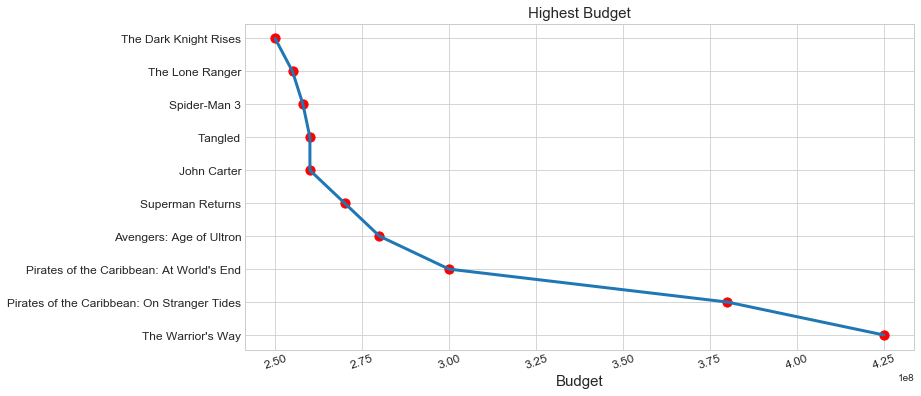

In [1047]:
# Connected Scatter Plot which represents highest Budgets

plt.figure(figsize=(12, 6))
plt.style.use('seaborn-whitegrid')
plt.scatter(first_10_budget['budget'],np.arange(10), c='red',s=85)
plt.plot(first_10_budget['budget'],first_10_budget['original_title'], linewidth=3)
plt.xticks(fontsize=12, rotation=20)
plt.yticks(fontsize=12)
plt.xlabel('Budget', fontsize=15)
plt.title('Highest Budget', fontsize=15)

In [1049]:
# Top 10 lowest budget movies

last_10_budget = lowest_10(df['budget'].replace(0,np.nan))
last_10_budget.head(3)

id  popularity  budget  revenue                      original_title  \
3581   59296    0.520430       1     1378             Love, Wedding, Marriage   
3065   12689    0.472691       1        0  Angus, Thongs and Perfect Snogging   
1151  287524    0.177102       1        0                         Fear Clinic   

                                                   cast         director  \
3581  Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...  Dermot Mulroney   
3065  Georgia Groome|Eleanor Tomlinson|Aaron Taylor-...  Gurinder Chadha   
1151  Thomas Dekker|Robert Englund|Cleopatra Coleman...      Robert Hall   

                                                tagline  \
3581                               Here comes the ride.   
3065  Georgia Nicholson is not mental, but her life is.   
1151                                                NaN   

                                               keywords  runtime  \
3581                         wedding vows|marriage|love       90   
3065  adolescence|parents kids relationship|becoming...      100   
1151                                 phobia|doctor|fear       95   

                           genres  \
3581               Comedy|Romance   
3065  Comedy|Drama|Family|Romance   
1151                       Horror   

                                   production_companies  vote_count  \
3581  120dB Films|Scion Films|Voodoo Production Serv...          55   
3065  Paramount Pictures|Nickelodeon Movies|Stella-d...         146   
1151  Dry County Films|Anchor Bay Entertainment|Movi...          15   

      vote_average  release_year  profit  
3581           5.3          2011    1377  
3065           6.5          2008      -1  
1151           4.1          2014      -1

Text(0.5,1,'Lowest Budget')

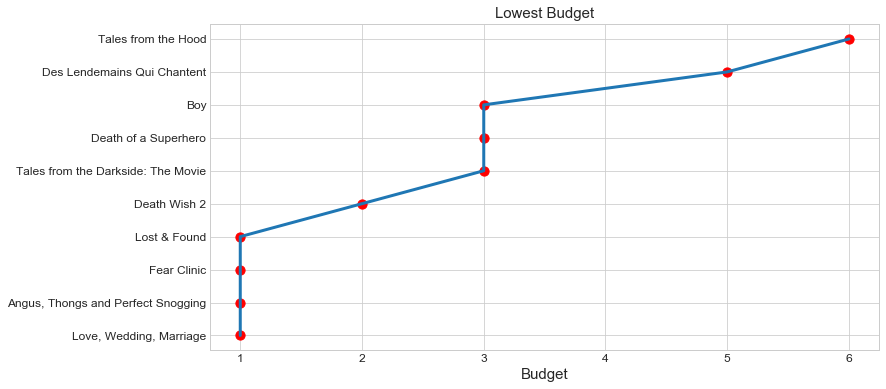

In [1050]:
# Connected Scatter Plot which represents Lowest Budgets

plt.figure(figsize=(12, 6))
plt.scatter(last_10_budget['budget'],np.arange(10), c='red',s=85)
plt.plot(last_10_budget['budget'],last_10_budget['original_title'], linewidth=3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Budget', fontsize=15)
plt.title('Lowest Budget', fontsize=15)

### Research Question 2 : Average Budget of Profitable and Non Profitable Movies
Here, I have shown some statistics for profitable movies and non profitable movies budget. I have also made two plots for the same.

In [1053]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# Some statistics for Profitable Movies
profit_budget_describe = profitable_movies[['budget']].describe()
profit_budget_describe

budget
count  8.478000e+03
mean   1.319719e+07
std    3.221441e+07
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    9.000000e+06
max    3.800000e+08

In [1055]:
# Some statistics for Non profitable movies

non_profit_budget_describe = non_profitable_movies[['budget']].describe()
non_profit_budget_describe

budget
count  2.387000e+03
mean   1.969297e+07
std    2.513082e+07
min    1.000000e+00
25%    4.000000e+06
50%    1.100000e+07
75%    2.500000e+07
max    4.250000e+08

Text(0,0.5,'Budget')

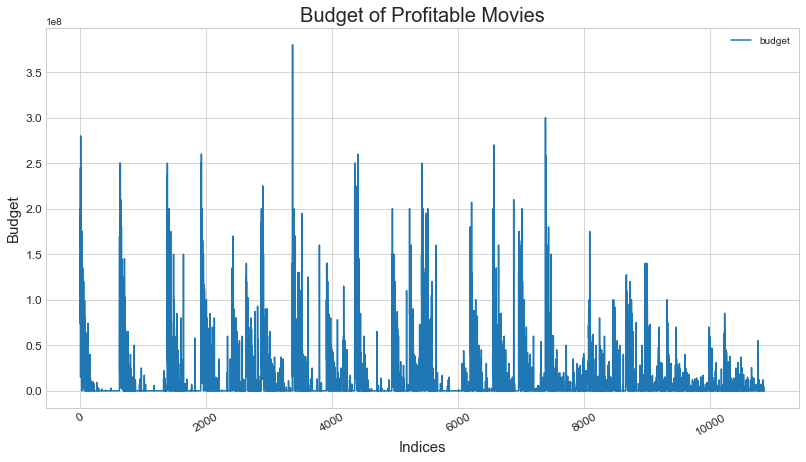

In [1059]:
# Plot for Profitable movies budget

profitable_movies['budget'].plot(kind='line',figsize=(13.5,7), legend=True, rot=30)
plt.title('Budget of Profitable Movies', fontsize=20)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.xlabel('Indices', fontsize=15)
plt.ylabel('Budget', fontsize=15)

Text(0,0.5,'Budget')

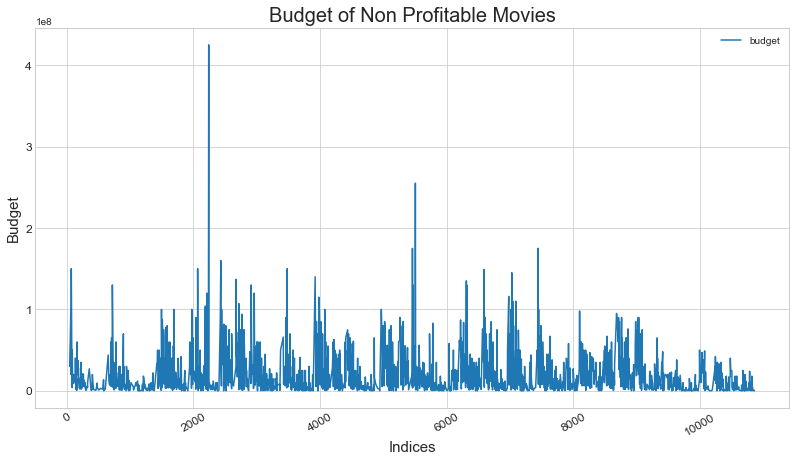

In [1061]:
# Plot for non profitable movies budget

non_profitable_movies['budget'].plot(kind='line',figsize=(13.5,7), legend=True, rot=30)
plt.title('Budget of Non Profitable Movies', fontsize=20)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.xlabel('Indices', fontsize=15)
plt.ylabel('Budget', fontsize=15)

### Research Question 3 : Top 10 Highest and Lowest Revenue Movies

In [1062]:
# Top 10 Highest Revenue Movies
first_10_revenue = top_10(df['revenue'])
first_10_revenue.head(3)

id  popularity     budget     revenue                original_title  \
1386   19995    9.432768  237000000  2781505847                        Avatar   
3     140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
5231     597    4.355219  200000000  1845034188                       Titanic   

                                                   cast       director  \
1386  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...  James Cameron   
3     Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...    J.J. Abrams   
5231  Kate Winslet|Leonardo DiCaprio|Frances Fisher|...  James Cameron   

                                        tagline  \
1386                Enter the World of Pandora.   
3                 Every generation has a story.   
5231  Nothing on Earth could come between them.   

                                               keywords  runtime  \
1386  culture clash|future|space war|space colony|so...      162   
3                 android|spaceship|jedi|space opera|3d      136   
5231               shipwreck|iceberg|ship|panic|titanic      194   

                                        genres  \
1386  Action|Adventure|Fantasy|Science Fiction   
3     Action|Adventure|Science Fiction|Fantasy   
5231                    Drama|Romance|Thriller   

                                   production_companies  vote_count  \
1386  Ingenious Film Partners|Twentieth Century Fox ...        8458   
3             Lucasfilm|Truenorth Productions|Bad Robot        5292   
5231  Paramount Pictures|Twentieth Century Fox Film ...        4654   

      vote_average  release_year      profit  
1386           7.1          2009  2544505847  
3              7.5          2015  1868178225  
5231           7.3          1997  1645034188

Text(0.5,1,'Highest Revenue')

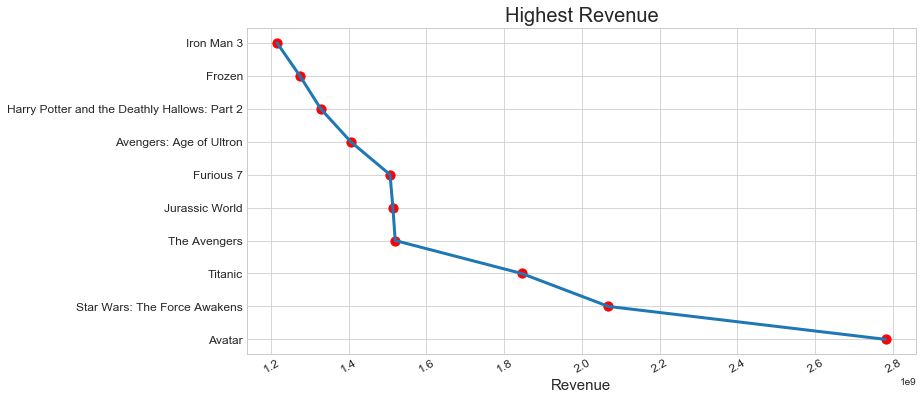

In [1066]:
#Plot for top 10 highest revenue movies

plt.figure(figsize=(12, 6))
plt.scatter(first_10_revenue['revenue'],np.arange(10), c='red',s=85)
plt.plot(first_10_revenue['revenue'],first_10_revenue['original_title'], linewidth=3 )
plt.xlabel('Revenue', fontsize=15)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.title('Highest Revenue', fontsize=20)

In [1067]:
# Top 10 lowest revenue movies

last_10_revenue = lowest_10(df['revenue'])
last_10_revenue.head(3)

id  popularity  budget  revenue            original_title  \
10865   22293    0.035919   19000        0  Manos: The Hands of Fate   
5190   245454    0.154678       0        0             Helen of Troy   
5189    10981    0.156803       0        0                   Nothing   

                                                    cast            director  \
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...    Harold P. Warren   
5190   Sienna Guillory|Matthew Marsden|Rufus Sewell|J...  John Kent Harrison   
5189   David Hewlett|Andrew Miller|Gordon Pinsent|Mar...     Vincenzo Natali   

                                                 tagline  \
10865       It's Shocking! It's Beyond Your Imagination!   
5190   Their passion ignited a war and destroyed an e...   
5189                                                 NaN   

                                                keywords  runtime  \
10865                fire|gun|drive|sacrifice|flashlight       74   
5190                                        love|history      175   
5189   loser|bullying|leere|independent film|best friend       90   

                               genres production_companies  vote_count  \
10865                          Horror            Norm-Iris          15   
5190         War|Action|Drama|Romance   Fuel Entertainment          12   
5189   Comedy|Fantasy|Science Fiction                  NaN          14   

       vote_average  release_year  profit  
10865           1.5          1966  -19000  
5190            5.5          2003       0  
5189            5.5          2003       0

Text(0.5,1,'Lowest Revenue')

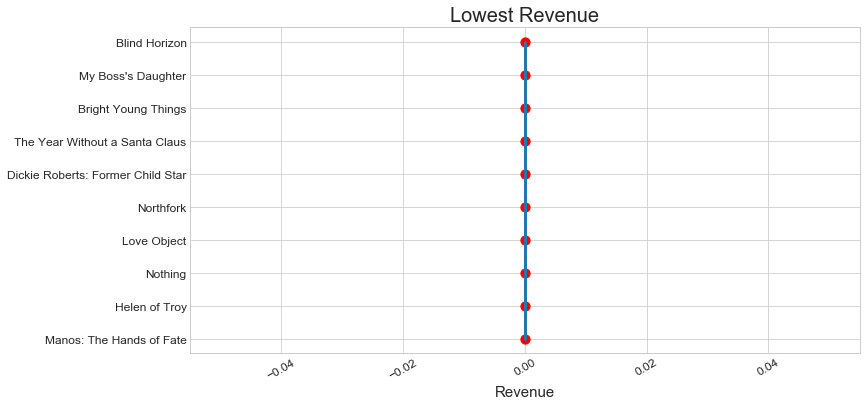

In [1069]:
#Plot for Lowest Revenue Movies

plt.figure(figsize=(12, 6))
plt.scatter(last_10_revenue['revenue'],np.arange(10), c='red',s=85)
plt.plot(last_10_revenue['revenue'],last_10_revenue['original_title'], linewidth=3)
plt.xlabel('Revenue', fontsize=15)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.title('Lowest Revenue', fontsize=20)

**In this plot, we see that we have only a straight line. It is just because of revenue 0 for lowest revenue movies.**

### Research Question 4 : Average Revenue of Profitable and Non Profitable Movies
Here, I have shown some statistics on profitable movies revenue and non profitable movies revenue. I have also made two plots for the same.

In [1071]:
# Some statistics for Profitable Movies Revenue

profit_revenue_describe = profitable_movies[['revenue']].describe()
profit_revenue_describe

revenue
count  8.478000e+03
mean   4.911463e+07
std    1.307138e+08
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    3.780281e+07
max    2.781506e+09

In [1073]:
# Some statistics for Non Profitable Movies

non_profit_revenue_describe = non_profitable_movies[['revenue']].describe()
non_profit_revenue_describe

revenue
count  2.387000e+03
mean   6.839282e+06
std    1.546504e+07
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    6.737532e+06
max    1.730000e+08

Text(0,0.5,'Revenue')

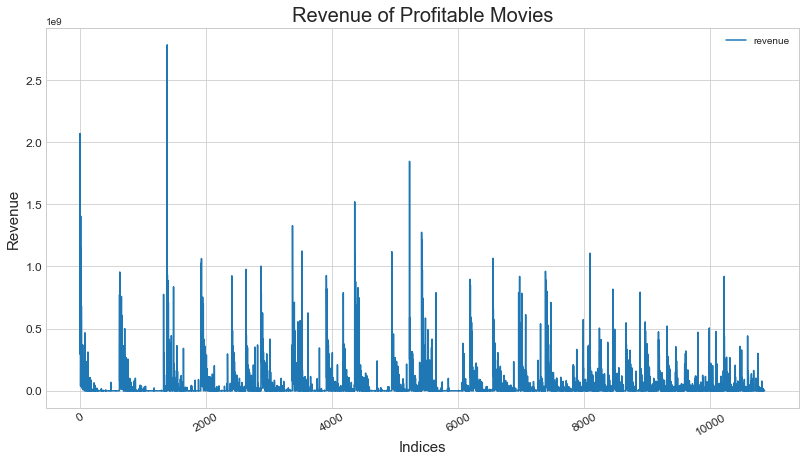

In [1074]:
# Plot for Profitable movies Revenue

profitable_movies['revenue'].plot(kind='line',figsize=(13.5,7), legend=True)
plt.title('Revenue of Profitable Movies', fontsize=20)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.xlabel('Indices', fontsize=15)
plt.ylabel('Revenue', fontsize=15)

Text(0,0.5,'revenue')

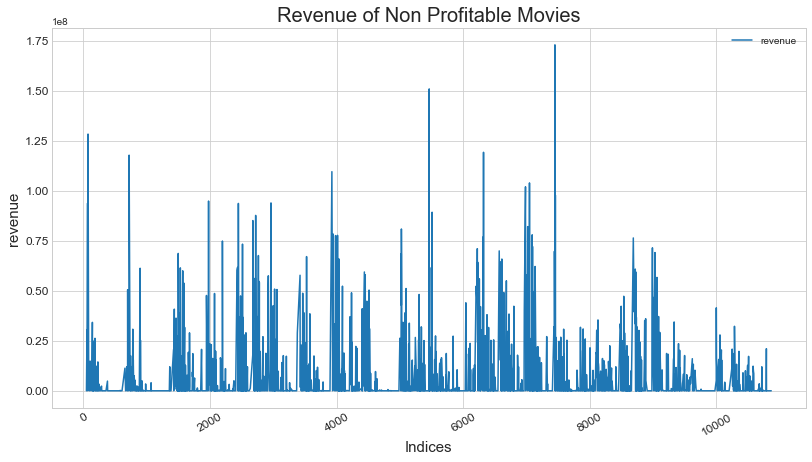

In [1075]:
# Plot for Non Profitable movies Revenue

non_profitable_movies['revenue'].plot(kind='line',figsize=(13.5,7), legend=True)
plt.title('Revenue of Non Profitable Movies', fontsize=20)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.xlabel('Indices', fontsize=15)
plt.ylabel('revenue', fontsize=15)

###  Research Question 5 : Top 10 Profitable and Non Profitable Movies

In [1076]:
# top 10 profitable movies
first_10_profit = top_10(df['profit'])
first_10_profit.head(3)

id  popularity     budget     revenue                original_title  \
1386   19995    9.432768  237000000  2781505847                        Avatar   
3     140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
5231     597    4.355219  200000000  1845034188                       Titanic   

                                                   cast       director  \
1386  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...  James Cameron   
3     Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...    J.J. Abrams   
5231  Kate Winslet|Leonardo DiCaprio|Frances Fisher|...  James Cameron   

                                        tagline  \
1386                Enter the World of Pandora.   
3                 Every generation has a story.   
5231  Nothing on Earth could come between them.   

                                               keywords  runtime  \
1386  culture clash|future|space war|space colony|so...      162   
3                 android|spaceship|jedi|space opera|3d      136   
5231               shipwreck|iceberg|ship|panic|titanic      194   

                                        genres  \
1386  Action|Adventure|Fantasy|Science Fiction   
3     Action|Adventure|Science Fiction|Fantasy   
5231                    Drama|Romance|Thriller   

                                   production_companies  vote_count  \
1386  Ingenious Film Partners|Twentieth Century Fox ...        8458   
3             Lucasfilm|Truenorth Productions|Bad Robot        5292   
5231  Paramount Pictures|Twentieth Century Fox Film ...        4654   

      vote_average  release_year      profit  
1386           7.1          2009  2544505847  
3              7.5          2015  1868178225  
5231           7.3          1997  1645034188

Text(0.5,1,'Highest Profit')

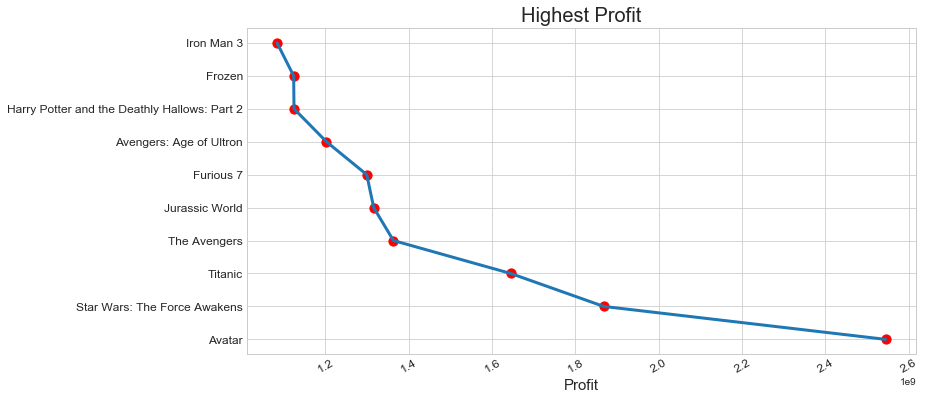

In [1077]:
#Connected Scatter Plot for Highest Profit Movies

plt.figure(figsize=(12, 6))
plt.scatter(first_10_profit['profit'],np.arange(10), c='red',s=85)
plt.plot(first_10_profit['profit'],first_10_revenue['original_title'], linewidth=3)
plt.xlabel('Profit', fontsize=15)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.title('Highest Profit', fontsize=20)

In [1080]:
#Top unprofitable Movies
last_10_profit = lowest_10(df['profit'])
last_10_profit.head(3)

id  popularity     budget   revenue     original_title  \
2244  46528    0.250540  425000000  11087569  The Warrior's Way   
5508  57201    1.214510  255000000  89289910    The Lone Ranger   
2069   7978    0.642475  150000000         0        The Wolfman   

                                                   cast        director  \
2244  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...      Sngmoo Lee   
5508  Johnny Depp|Armie Hammer|William Fichtner|Hele...  Gore Verbinski   
2069  Benicio del Toro|Anthony Hopkins|Emily Blunt|H...    Joe Johnston   

                                             tagline  \
2244                         Assassin. Hero. Legend.   
5508                         Never Take Off the Mask   
2069  When the moon is full the legend comes to life   

                                               keywords  runtime  \
2244  assassin|small town|revenge|deception|super speed      100   
5508          texas|horse|survivor|texas ranger|partner      149   
2069  father-son relationship|victorian england|rura...      102   

                                         genres  \
2244  Adventure|Fantasy|Action|Western|Thriller   
5508                   Action|Adventure|Western   
2069                      Horror|Thriller|Drama   

                                   production_companies  vote_count  \
2244                           Boram Entertainment Inc.          74   
5508  Walt Disney Pictures|Jerry Bruckheimer Films|I...        1607   
2069  Universal Pictures|Stuber Productions|Relativi...         299   

      vote_average  release_year     profit  
2244           6.4          2010 -413912431  
5508           6.0          2013 -165710090  
2069           5.4          2010 -150000000

Text(0.5,1,'Highest Loss')

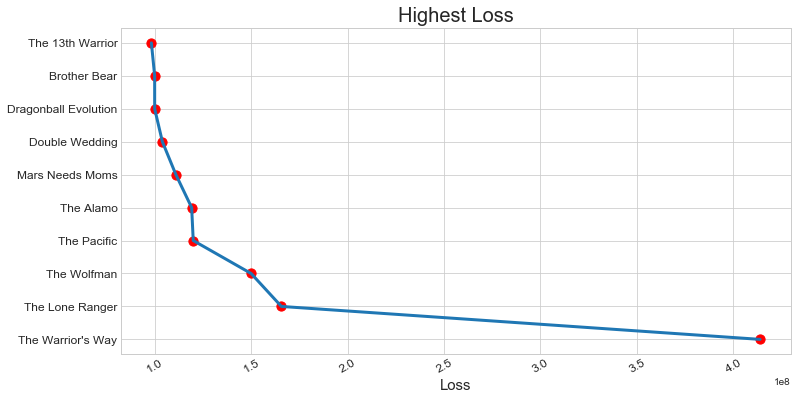

In [1081]:
# Connected Scatter plot for Non Profitable Movies

plt.figure(figsize=(12, 6))
plt.scatter(last_10_profit['profit']*(-1),np.arange(10), c='red',s=85)
plt.plot(last_10_profit['profit']*(-1),last_10_profit['original_title'], linewidth=3 )
plt.xlabel('Loss', fontsize=15)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.title('Highest Loss', fontsize=20)

### Research Question 6 : Average Profit of Profitable and Non Profitable movies

In [1078]:
#Some statistics for Profitable Movies
profit_describe = profitable_movies[['profit']].describe()
profit_describe

profit
count  8.478000e+03
mean   3.591745e+07
std    1.065103e+08
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    2.163547e+07
max    2.544506e+09

In [1079]:
##Some statistics for Non Profitable Movies
non_profit_describe = non_profitable_movies[['profit']].describe()
non_profit_describe

profit
count  2.387000e+03
mean  -1.285368e+07
std    1.786984e+07
min   -4.139124e+08
25%   -1.601496e+07
50%   -7.500000e+06
75%   -2.544869e+06
max   -1.000000e+00

Text(0,0.5,'Profit')

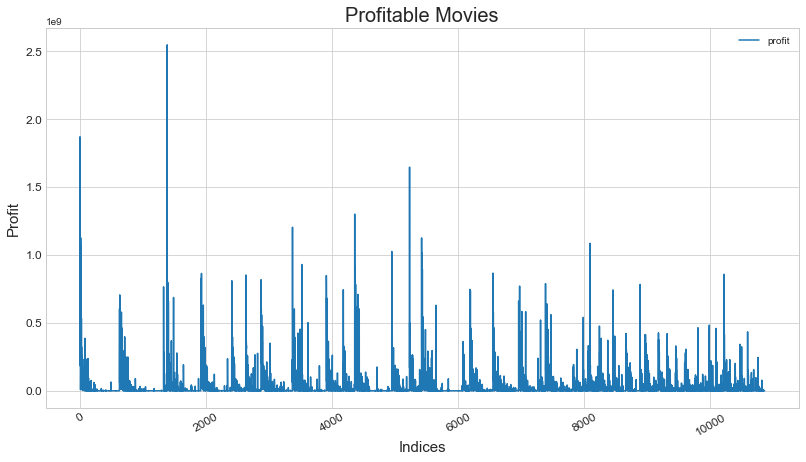

In [1082]:
# Plot for Profitable movies

profitable_movies['profit'].plot(kind='line',figsize=(13.5,7), legend=True)
plt.title('Profitable Movies', fontsize=20)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.xlabel('Indices', fontsize=15)
plt.ylabel('Profit', fontsize=15)

Text(0,0.5,'Loss')

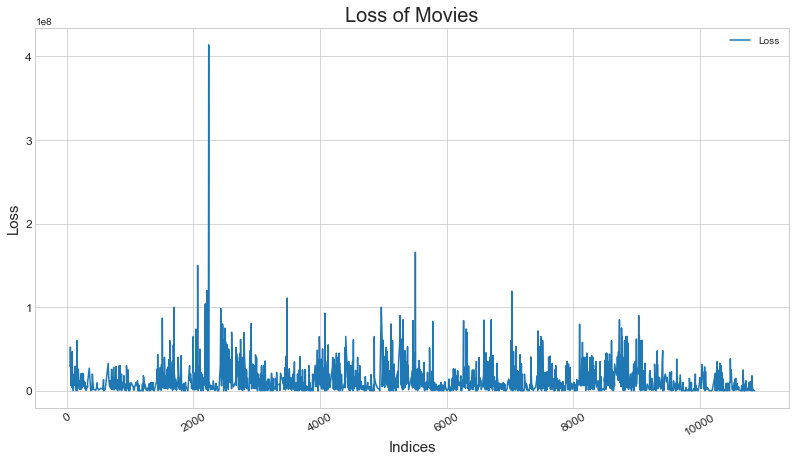

In [1083]:
# Plot for Non Profitable movies

(non_profitable_movies['profit']*(-1)).plot(kind='line',figsize=(13.5,7), legend=True, label='Loss')
plt.title('Loss of Movies', fontsize=20)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.xlabel('Indices', fontsize=15)
plt.ylabel('Loss', fontsize=15)

### Research Question 7 : Top 10 Most Popular Movies and Unpopular Movies

In [1084]:
#Top 10 most popular movies
first_10_popular = top_10(df['popularity'])
first_10_popular.head(3)

id  popularity     budget     revenue      original_title  \
0    135397   32.985763  150000000  1513528810      Jurassic World   
1     76341   28.419936  150000000   378436354  Mad Max: Fury Road   
629  157336   24.949134  165000000   621752480        Interstellar   

                                                  cast           director  \
0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...    Colin Trevorrow   
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...      George Miller   
629  Matthew McConaughey|Jessica Chastain|Anne Hath...  Christopher Nolan   

                                               tagline  \
0                                    The park is open.   
1                                   What a Lovely Day.   
629  Mankind was born on Earth. It was never meant ...   

                                              keywords  runtime  \
0    monster|dna|tyrannosaurus rex|velociraptor|island      124   
1     future|chase|post-apocalyptic|dystopia|australia      120   
629  saving the world|artificial intelligence|fathe...      169   

                                        genres  \
0    Action|Adventure|Science Fiction|Thriller   
1    Action|Adventure|Science Fiction|Thriller   
629            Adventure|Drama|Science Fiction   

                                  production_companies  vote_count  \
0    Universal Studios|Amblin Entertainment|Legenda...        5562   
1    Village Roadshow Pictures|Kennedy Miller Produ...        6185   
629  Paramount Pictures|Legendary Pictures|Warner B...        6498   

     vote_average  release_year      profit  
0             6.5          2015  1363528810  
1             7.1          2015   228436354  
629           8.0          2014   456752480

Text(0.5,1,'Highest Popularity')

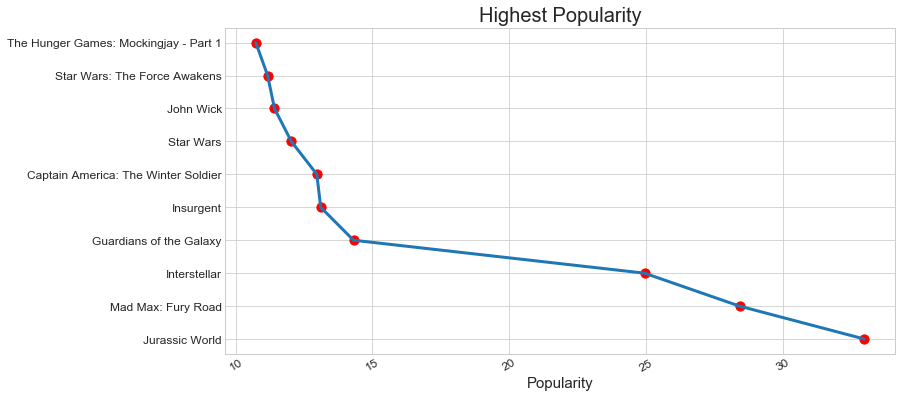

In [1085]:
#Connected Scatter plot for Highest Popular Movies

plt.figure(figsize=(12, 6))
plt.scatter(first_10_popular['popularity'],np.arange(10), c='red',s=85)
plt.plot(first_10_popular['popularity'],first_10_popular['original_title'], linewidth=3)
plt.xlabel('Popularity', fontsize=15)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.title('Highest Popularity', fontsize=20)

In [1087]:
#Lowest Popular Movies
last_10_popular  = lowest_10(df['popularity'])
last_10_popular.head(3)

id  popularity  budget  revenue           original_title  \
6181   18729    0.000065       0        0  North and South, Book I   
9977   32082    0.000188       0        0             The Hospital   
6080  174323    0.000620       0        0                   G.B.F.   

                                                   cast       director  \
6181  Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...            NaN   
9977  George C. Scott|Diana Rigg|Richard Dysart|Barn...  Arthur Hiller   
6080  Michael J. Willett|Paul Iacono|Sasha Pieterse|...   Darren Stein   

                               tagline  \
6181                               NaN   
9977  Madness, Murder and Malpractice.   
6080   Being out has never been so in.   

                                         keywords  runtime  \
6181                                          NaN      561   
9977                          hospital|malpratice      103   
6080  gay|gay kiss|coming out|high school|friends       92   

                     genres  \
6181  Drama|History|Western   
9977   Mystery|Comedy|Drama   
6080                 Comedy   

                                   production_companies  vote_count  \
6181                                                NaN          17   
9977                                 Simcha Productions          10   
6080  School Pictures|Parting Shots Media|Logolite E...          82   

      vote_average  release_year  profit  
6181           6.0          1985       0  
9977           6.4          1971       0  
6080           6.1          2013       0

Text(0.5,1,'Lowest Popularity')

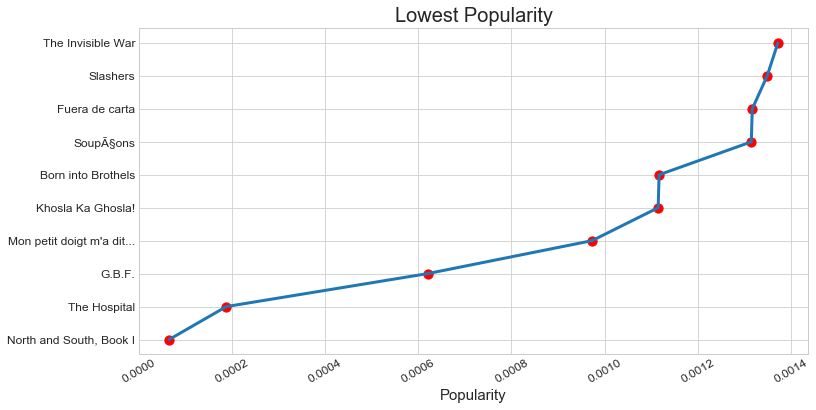

In [1088]:
# Connected Scatter Plot for Lowest Popular Movies

plt.figure(figsize=(12, 6))
plt.scatter(last_10_popular['popularity'],np.arange(10), c='red',s=85)
plt.plot(last_10_popular['popularity'],last_10_popular['original_title'], linewidth=3 )
plt.xlabel('Popularity', fontsize=15)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.title('Lowest Popularity', fontsize=20)

### Research Question 8 : Visualizing the Data using Genres
I am going to investigate which genres are most popular.

In [431]:
# Function to get value counts of a particular columns seperated by '|'

def count_by_column(data):
    all_values = data.str.cat(sep='|')
    return pd.Series(all_values.split('|')).value_counts()


Text(0,0.5,'Frequency')

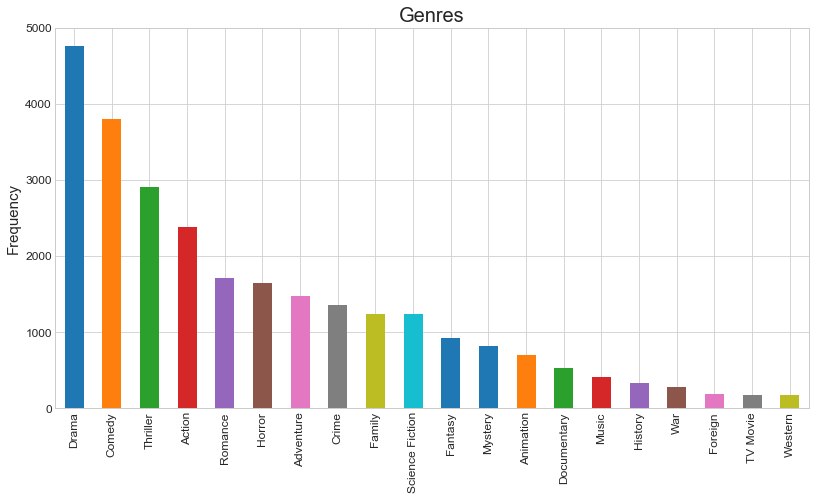

In [1089]:
# Plot for the genres occured most

plt.figure(figsize=(13.5,7))
genres = count_by_column(df['genres'])
genres.plot(kind='bar')
plt.title('Genres', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Frequency', fontsize=15)

### Research Question 9 : Visualizing the data using most common Production Companies
Here, I categorize the data according to thier Production Companies.

Text(0.5,1,'Production Companies')

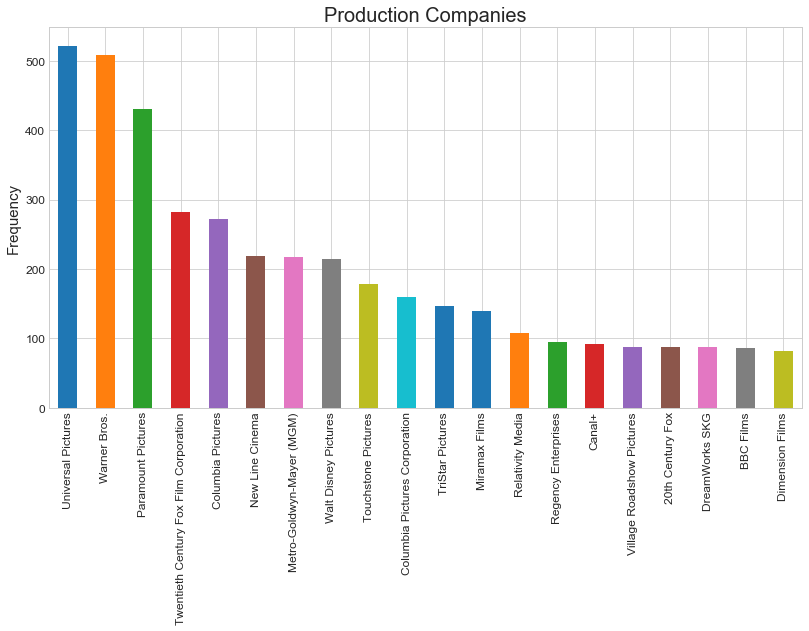

In [477]:
#Highest Movies by Production Companies

production_companies = count_by_column(df['production_companies'])
top_20_production_companies = production_companies[:20]
top_20_production_companies.plot(kind='bar', figsize=(13.5,7))
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Production Companies', fontsize=20)

### Reaserch Question 10 : Average Runtime of Profitable and Non profitable movies

In [1090]:
# Some statistics of Runtime for all over the data

runtime_describe = df[['runtime']].describe()
runtime_describe

runtime
count  10865.000000
mean     102.071790
std       31.382701
min        0.000000
25%       90.000000
50%       99.000000
75%      111.000000
max      900.000000

Text(0,0.5,'Indices')

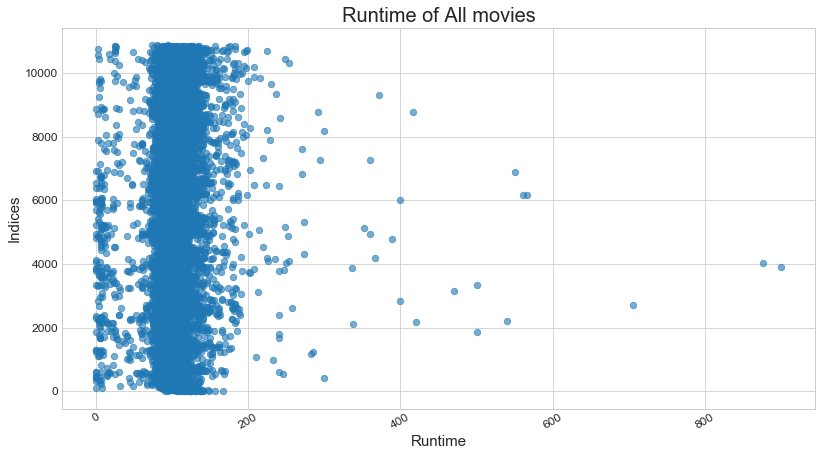

In [1091]:
# Scatter Plot for Runtime of all the movies

plt.figure(figsize=(13.5,7))
plt.scatter(df['runtime'], np.arange(10865), alpha=0.6, s=40)
plt.title('Runtime of All movies', fontsize=20)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Indices', fontsize=15)

In [1092]:
# Some statistics of Runtime for Profitable Movies

profit_runtime_describe = profitable_movies[['runtime']].describe()
profit_runtime_describe

runtime
count  8478.000000
mean    101.670677
std      32.923862
min       0.000000
25%      90.000000
50%      98.000000
75%     111.000000
max     900.000000

Text(0,0.5,'Indices')

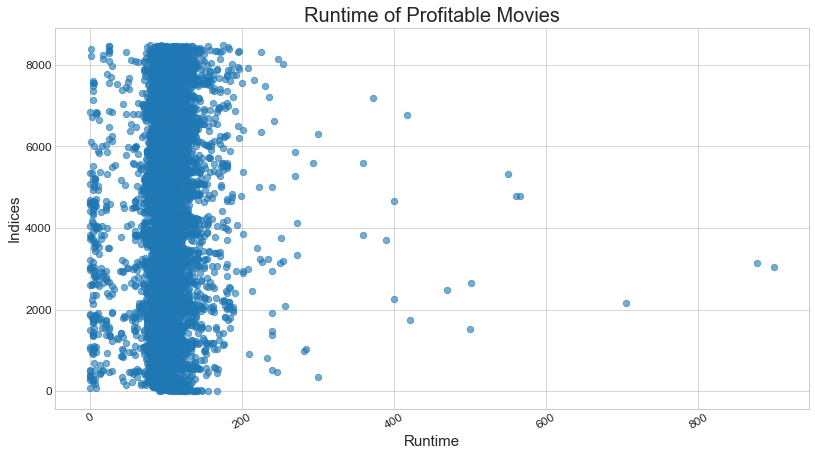

In [1093]:
# Scatter plot for Runtime of Profitable Movies

plt.figure(figsize=(13.5,7))
plt.scatter(profitable_movies['runtime'], np.arange(len(profitable_movies)), alpha=0.6, s=40)
plt.title('Runtime of Profitable Movies', fontsize=20)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Indices', fontsize=15)

In [1094]:
# Some statistics of Runtime for Non Profitable Movies

non_profit_runtime_describe = non_profitable_movies[['runtime']].describe()
non_profit_runtime_describe

runtime
count  2387.000000
mean    103.496439
std      25.111292
min       0.000000
25%      91.000000
50%      99.000000
75%     112.000000
max     540.000000

Text(0,0.5,'Indices')

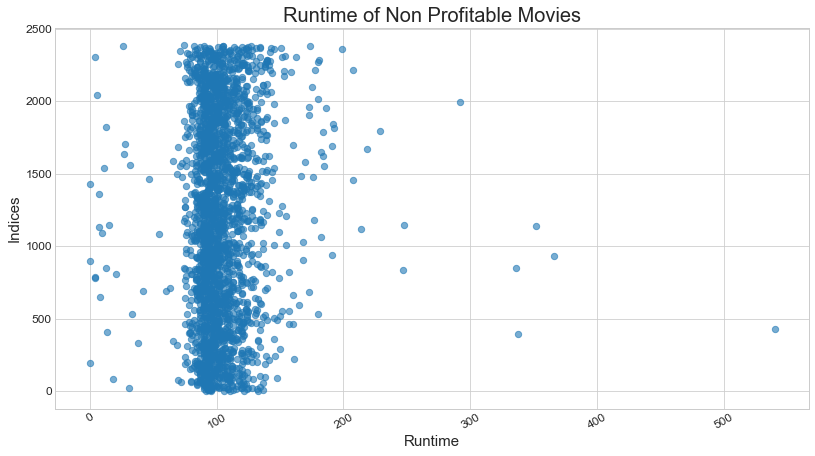

In [1095]:
# Scatter plot for Runtime of Non Profitable Movies

plt.figure(figsize=(13.5,7))
plt.scatter(non_profitable_movies['runtime'], np.arange(len(non_profitable_movies)), alpha=0.6, s=40)
plt.title('Runtime of Non Profitable Movies', fontsize=20)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Indices', fontsize=15)

### Research Question 11 : Top 10 Highest and Lowest Voted Movies

In [1096]:
#Top 10 voted movies
first_10_voted = top_10(df['vote_count'])
first_10_voted.head(3)

id  popularity     budget     revenue original_title  \
1919  27205    9.363643  160000000   825500000      Inception   
4361  24428    7.637767  220000000  1519557910   The Avengers   
1386  19995    9.432768  237000000  2781505847         Avatar   

                                                   cast           director  \
1919  Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...  Christopher Nolan   
4361  Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...        Joss Whedon   
1386  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...      James Cameron   

                                   tagline  \
1919  Your mind is the scene of the crime.   
4361               Some assembly required.   
1386           Enter the World of Pandora.   

                                               keywords  runtime  \
1919   loss of lover|dream|sleep|subconsciousness|heist      148   
4361       new york|shield|marvel comic|comic|superhero      143   
1386  culture clash|future|space war|space colony|so...      162   

                                                 genres  \
1919  Action|Thriller|Science Fiction|Mystery|Adventure   
4361                   Science Fiction|Action|Adventure   
1386           Action|Adventure|Fantasy|Science Fiction   

                                   production_companies  vote_count  \
1919            Legendary Pictures|Warner Bros.|Syncopy        9767   
4361                                     Marvel Studios        8903   
1386  Ingenious Film Partners|Twentieth Century Fox ...        8458   

      vote_average  release_year      profit  
1919           7.9          2010   665500000  
4361           7.3          2012  1299557910  
1386           7.1          2009  2544505847

Text(0.5,1,'Highest Vote Counts')

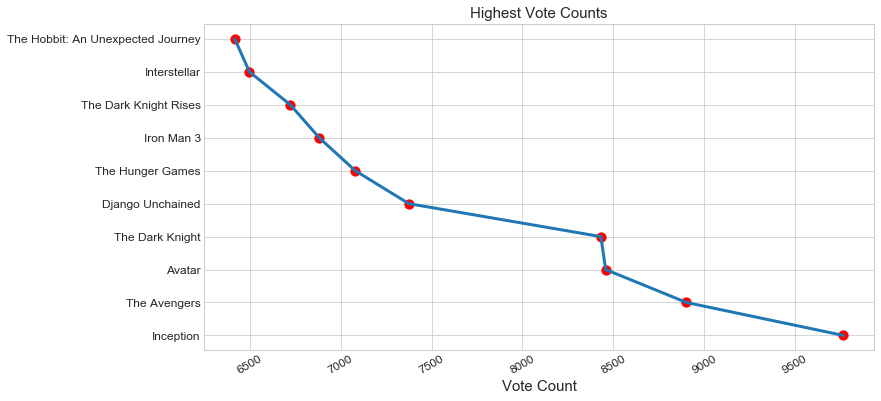

In [1097]:
#Connected Scatter Plot for Highest vote counts

plt.figure(figsize=(12, 6))
plt.scatter(first_10_voted['vote_count'],np.arange(10), c='red',s=85)
plt.plot(first_10_voted['vote_count'],first_10_voted['original_title'], linewidth=3 )
plt.xlabel('Vote Count', fontsize=15)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.title('Highest Vote Counts', fontsize=15)

In [1098]:
#Lowest Voted Movies
last_10_voted = lowest_10(df['vote_count'])
last_10_voted.head(3)

id  popularity  budget  revenue       original_title  \
1702  17669    0.317069       0        0     The Last Templar   
3282  15435    0.142411       0        0     Comme les autres   
3281  18089    0.142175       0        0  Miss Austen Regrets   

                                                   cast         director  \
1702  Mira Sorvino|Victor Garber|Scott Foley|Anthony...    Paolo Barzman   
3282  Lambert Wilson|Pilar LÃ³pez de Ayala|Pascal El...   Vincent Garenq   
3281  Olivia Williams|Imogen Poots|Greta Scacchi|Hug...  Jeremy Lovering   

     tagline keywords  runtime                            genres  \
1702     NaN      NaN      170  Adventure|Fantasy|Drama|Thriller   
3282     NaN      NaN       90              Comedy|Drama|Romance   
3281     NaN      NaN       90                             Drama   

                                   production_companies  vote_count  \
1702                     Muse Entertainment Enterprises          10   
3282                                                NaN          10   
3281  British Broadcasting Corporation (BBC)|NOVA/WG...          10   

      vote_average  release_year  profit  
1702           4.9          2009       0  
3282           5.0          2008       0  
3281           5.1          2008       0

### Research Question 12 : Which director gave most successful movies ?

In [1099]:
# Top 20 successful directors who made more number of profitable movies

profitable_directors = count_by_column(profitable_movies['director'])
directors = count_by_column(df['director'])
top_20_successful_directors = (directors - (directors - profitable_directors)).sort_values(ascending=False)[:20]
pd.DataFrame(top_20_successful_directors).rename(columns={0:'No of Successful Movies'})

No of Successful Movies
Woody Allen                              33.0
Clint Eastwood                           31.0
Steven Spielberg                         27.0
Martin Scorsese                          23.0
Tim Burton                               18.0
Ridley Scott                             17.0
Ron Howard                               17.0
Joel Schumacher                          17.0
Tyler Perry                              16.0
Robert Zemeckis                          16.0
Sidney Lumet                             16.0
Robert Rodriguez                         15.0
Norman Jewison                           15.0
Mike Nichols                             15.0
Richard Linklater                        14.0
Steven Soderbergh                        14.0
Rob Reiner                               14.0
Blake Edwards                            14.0
Francis Ford Coppola                     14.0
Joel Coen                                13.0

Text(0.5,1,'Successful Directors')

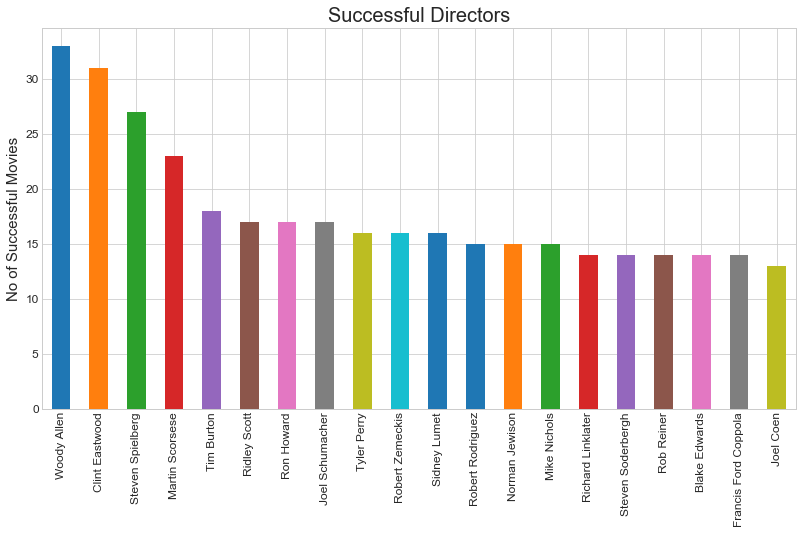

In [1100]:
#Plot for top 20 directors who gave highest number of successful movies

top_20_successful_directors.plot(kind='bar', figsize=(13.5,7))
plt.ylabel('No of Successful Movies', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Successful Directors', fontsize=20)

### Research Question 13 : Total Released Movie by Year

Text(0.5,1,'Released Movie by Year')

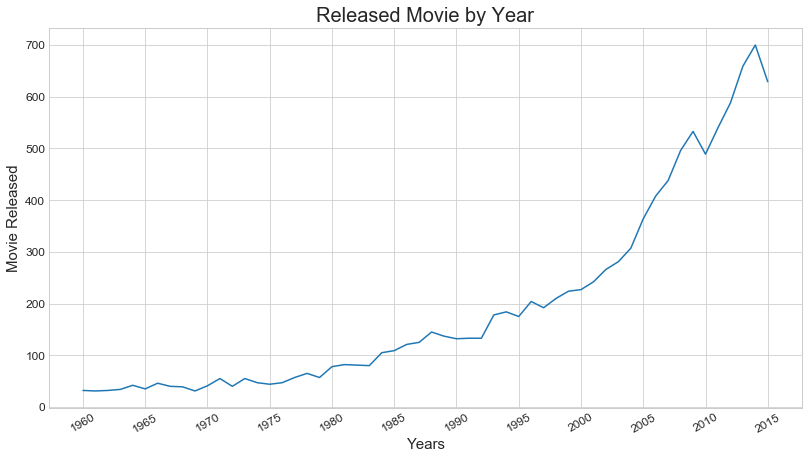

In [1101]:
#total number of movies released in a particular year

release_by_year = df.groupby('release_year').count()['id']
release_by_year.plot(figsize=(13.5,7))
plt.xticks(np.arange(1960,2016,5), fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Movie Released', fontsize=15)
plt.title('Released Movie by Year', fontsize=20)

### Research Question 14 : Genre Trends over the Year

In [1102]:
# Genre trends over the year by using popularity score

genre_names = list(genres.index[:])
genre_names.append('NaN')
popular_genres = pd.DataFrame(index=genre_names, columns=np.arange(1960,2016)).fillna(0)
years = list(df['release_year'])
genre_list = df['genres'].replace(np.nan,'NaN')
popularity_list = list(df['popularity'])
count = 0

for data in genre_list:
    split_data = data.split('|')
    popular_genres.loc[split_data, years[count]] += popularity_list[count]
    count+=1

Text(0.5,1,'Genres Popularity over the Year')

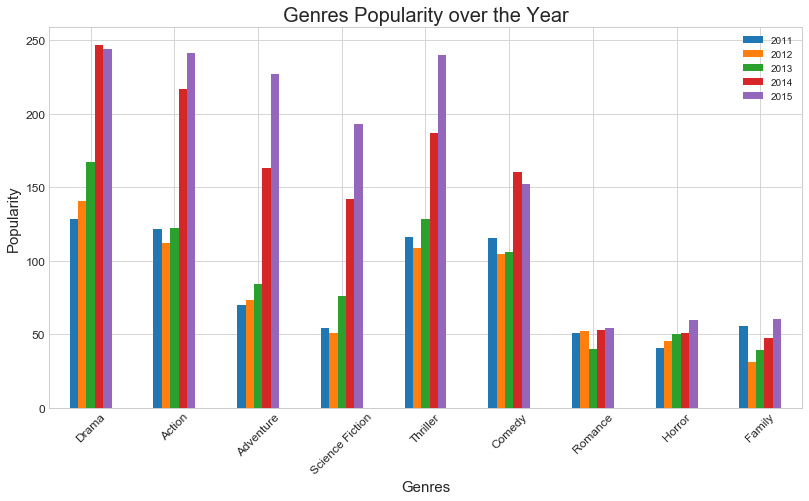

In [1104]:
#Plot for Genre trends over the year by using popularity score

popular_genres.loc[['Drama','Action','Adventure','Science Fiction','Thriller','Comedy','Romance','Horror','Family'],\
                   [2011,2012,2013,2014,2015]].plot(kind='bar',figsize=(13.5,7))
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.xlabel('Genres', fontsize=15)
plt.ylabel('Popularity', fontsize=15)
plt.title('Genres Popularity over the Year', fontsize=20)

### Research Question 15 : Profitable and Non Profitable movies by year

Text(0.5,1,'Profitable Movies by Year')

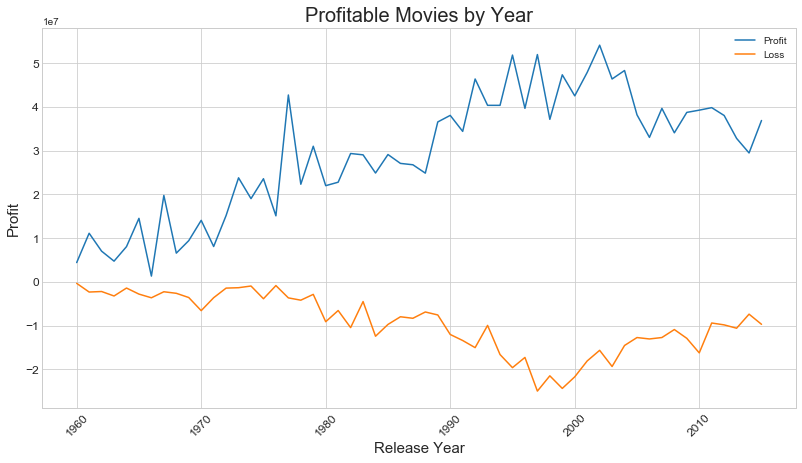

In [1106]:
#Plot for Profitable and Non Profitable movies over the year

profitable_movies.groupby('release_year')['profit'].mean().plot(figsize=(13.5,7), legend=True, label='Profit')
non_profitable_movies.groupby('release_year')['profit'].mean().plot(figsize=(13.5,7), legend=True, label='Loss')
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Profit', fontsize=15)
plt.title('Profitable Movies by Year', fontsize=20)

### Research Question 16 : Profit / Loss over the year

Text(0.5,1,'Year vs Average Profit')

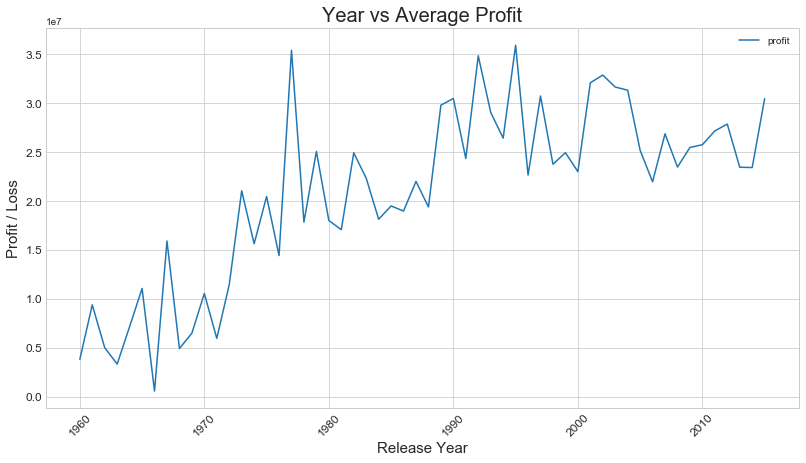

In [1107]:
#Plot for Average Profit/Loss over the year

df.groupby('release_year')['profit'].mean().plot(figsize=(13.5,7), legend=True)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Profit / Loss', fontsize=15)
plt.title('Year vs Average Profit', fontsize=20)

### Research Question 17 : How vote counts and vote average related to Profit ?

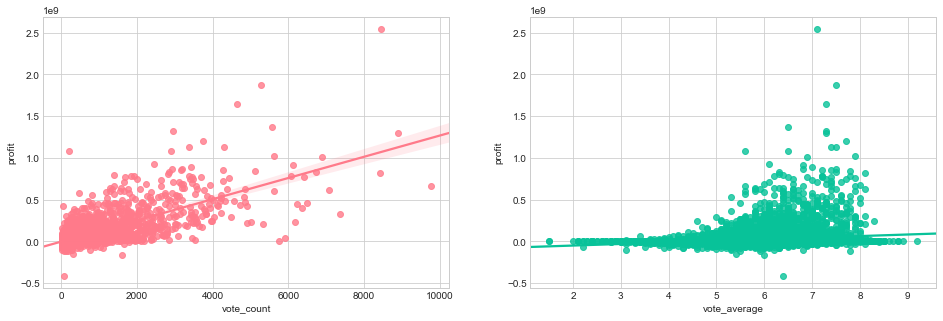

In [1108]:
#Regression Plot for 'vote_count and Profit' AND 'vote_average and profit'

fig, axes = plt.subplots(1,2,figsize=(16,5))
sns.regplot(x=df['vote_count'], y=df['profit'], color='#ff7a8a', ax=axes[0])
sns.regplot(x=df['vote_average'], y=df['profit'], color='#08c299', ax=axes[1])

### Research Question 18 : How runtime related with Release Year ?

Text(0.5,1,'Average Runtime over the Year')

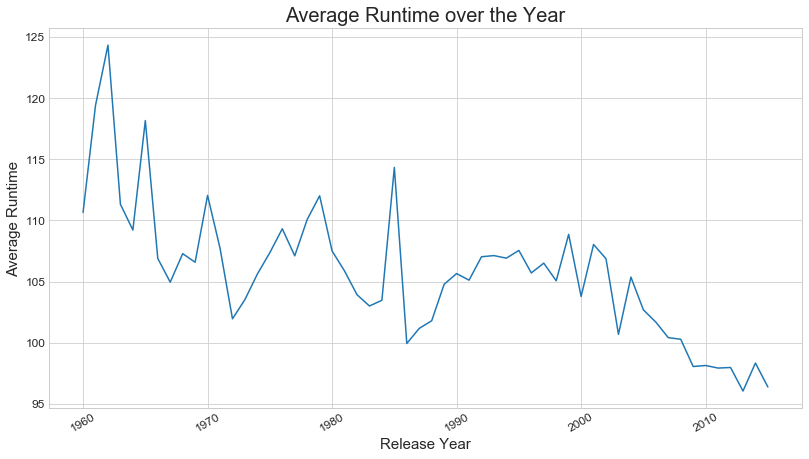

In [1109]:
#Plot for average runtime over the year

df.groupby('release_year')['runtime'].mean().plot(figsize=(13.5,7))
plt.xticks(fontsize=12,rotation=30)
plt.yticks(fontsize=12)
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Average Runtime', fontsize=15)
plt.title('Average Runtime over the Year', fontsize=20)

### Research Question 19 : Which cast appear most in Profitable and Non Profitable Movies?

Text(0.5,1,'Overall Cast Appearance')

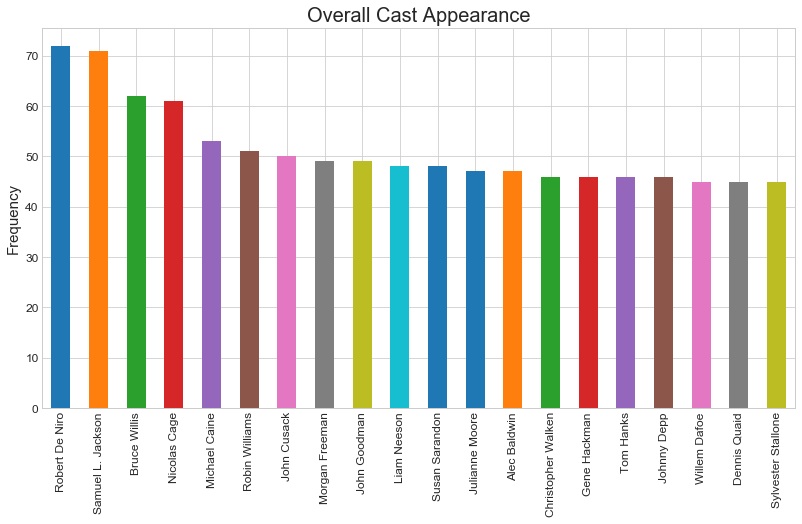

In [1110]:
#Plot of Casts appearance for all the movies

cast_appearance = count_by_column(df['cast'])
cast_appearance[:20].plot(kind='bar', figsize=(13.5,7))
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Overall Cast Appearance', fontsize=20)

Text(0.5,1,'Cast Appearance in Profitable Movies')

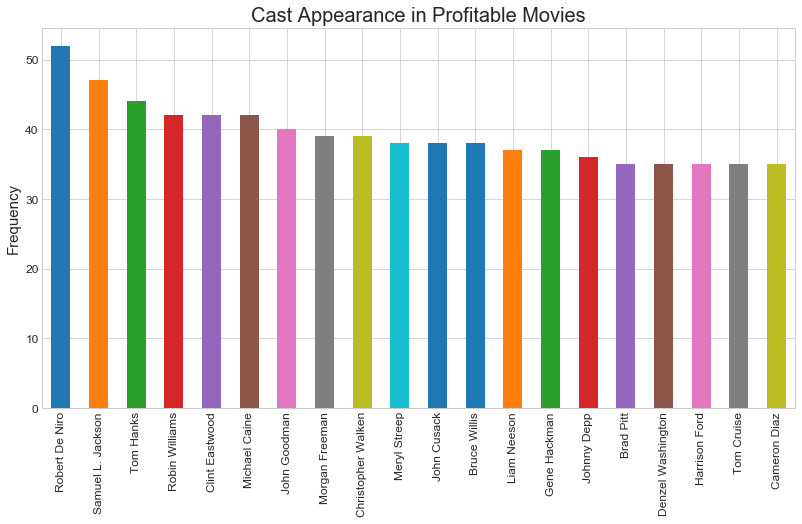

In [1111]:
#Plot of Casts appearance for Profitable Movies

profitable_cast_appearance = count_by_column(profitable_movies['cast'])
profitable_cast_appearance[:20].plot(kind='bar', figsize=(13.5,7))
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Cast Appearance in Profitable Movies', fontsize=20)

Text(0.5,1,'Cast Appearance in Non Profitable Movies')

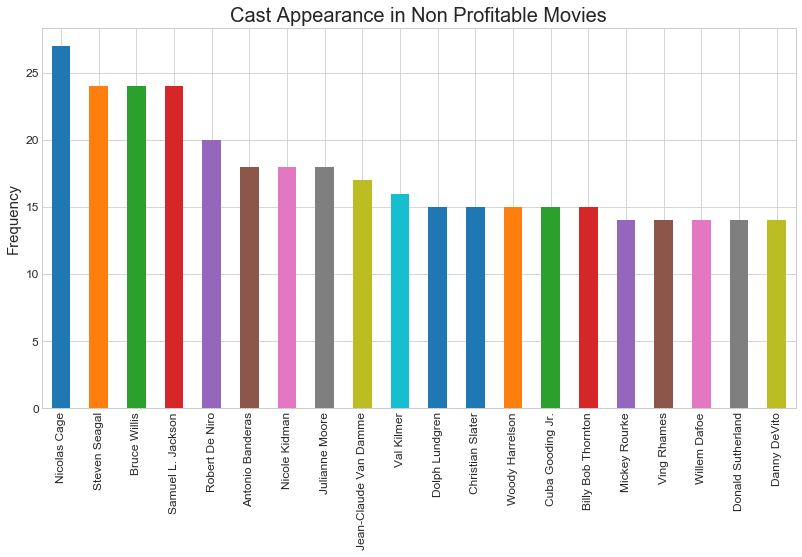

In [1112]:
#Plot of Casts Appearance for Non Profitable Movies

non_profitable_cast_appearance = count_by_column(non_profitable_movies['cast'])
non_profitable_cast_appearance[:20].plot(kind='bar', figsize=(13.5,7))
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Cast Appearance in Non Profitable Movies', fontsize=20)

### Research Question 20 : Properties associated with Profit
Here, we are going to analyse which properties are associated with high profit by just checking the above collected data.

**Answer :** In the very first, we have categorized the data by profitable movies and non profitable movies and persome some data wrangling and visualization. That will help us to find the answer of this question. There are different parameters, some of them are mentioned below...

**Properties associated with High Profit**
<li> Average Budget should be 1.319719e+07.
<li> Popularity score should be  approximately or above 10.
<li> Genres like Drama, Comedy, Thriller, Action, Romance are in trend.
<li> Production Companies like Universal Pictures, Warner Bros etc gives most profitable movies.
<li> Runtime may lie in between 90 to 120 minutes.
<li> Vote counts are also related to Profit.
<li> Directors like Woody Allen, Clint Eastwood and some more gives successful movies.
<li> Casts like Robert De Niro, Samuel L. Jackson give highest number of Profitable movies.
    
**Note :** These properties, mentioned above are not the exact values. These are estimated values only extracted from the given data and it may vary.

In [1113]:
# Correlation among the data

correlation = df.corr().iloc[1:8,1:8]
correlation

popularity    budget   revenue   runtime  vote_count  \
popularity      1.000000  0.545481  0.663360  0.139032    0.800828   
budget          0.545481  1.000000  0.734928  0.191300    0.632719   
revenue         0.663360  0.734928  1.000000  0.162830    0.791174   
runtime         0.139032  0.191300  0.162830  1.000000    0.163273   
vote_count      0.800828  0.632719  0.791174  0.163273    1.000000   
vote_average    0.209517  0.081067  0.172541  0.156813    0.253818   
release_year    0.089806  0.115904  0.057070 -0.117187    0.107962   

              vote_average  release_year  
popularity        0.209517      0.089806  
budget            0.081067      0.115904  
revenue           0.172541      0.057070  
runtime           0.156813     -0.117187  
vote_count        0.253818      0.107962  
vote_average      1.000000     -0.117576  
release_year     -0.117576      1.000000

<a id='conclusions'></a>
## Conclusions

This was an awesome experience to analyse some results of our favourite movies. It was a perfect and very inteesting data analysis. 

The conclusion of this project is "what are the properties related with high profit?". As I have already mentioned in Research Question:20. The properties related with profit. Just check it out once again if you have any doubt.

Those are the properties which will help us to get a successful movie with high profit. By follwing those instructions, the probability of getting unprofitable movies are very less. Expectancy of people means less probability of unsuccessful movies and those are the factors which can be increase expectancy of a successful movie. Currency is not given in the dataset so the above conclusion depends on the country where the movie is releasing. I just want to mention again, those are some estimations, not the exact values that a movie will earn profit. But it shows a high probability of getting successful movie.